In [9]:
import pandas as pd
import matplotlib.pyplot as plt
titanic=pd.read_csv("titanic_passengers.csv")

# Titanic Tabulation

The RMS Titanic was a British ocean liner that unfortunately crashed and sunk in the early 1910s. The story of the Titanic's sinking has become a cultural staple in modern day society, and therefore records of the passangers have well preserved. Here I will be analyzing this data using pandas, and asking some intriguing questions regarding my analysis

### Question 1: What are the average age group of the passangers

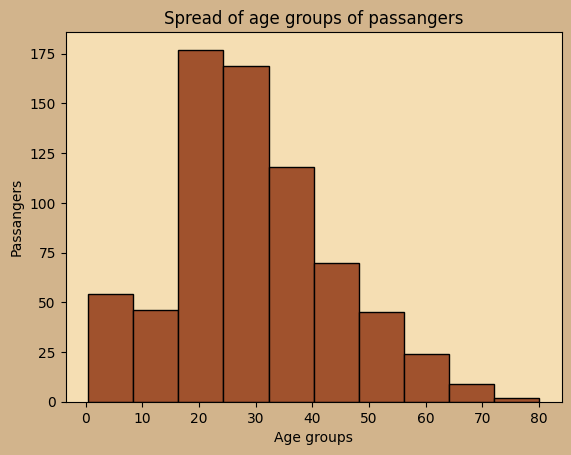

In [3]:
plt.figure(facecolor="tan")
plt.hist((titanic["Age"]),color='sienna', edgecolor='black')
plt.title("Spread of age groups of passangers")
plt.xlabel("Age groups")
plt.ylabel("Passangers")


ax=plt.gca()

ax.set_facecolor("wheat")

### Question 2: How many passangers rode in each class?

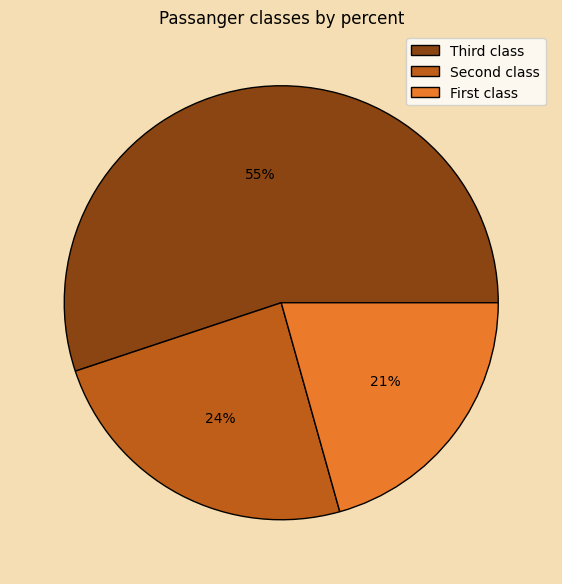

In [4]:
plt.figure(facecolor="wheat", figsize=(7,10))
plt.pie(
    titanic["Pclass"].value_counts(),  
    colors=("#8B4513", "#bf5e19", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"}
)
plt.title("Passanger classes by percent")
plt.legend(["Third class", "Second class", "First class"])

### Question 3: How many passengers rode with family?

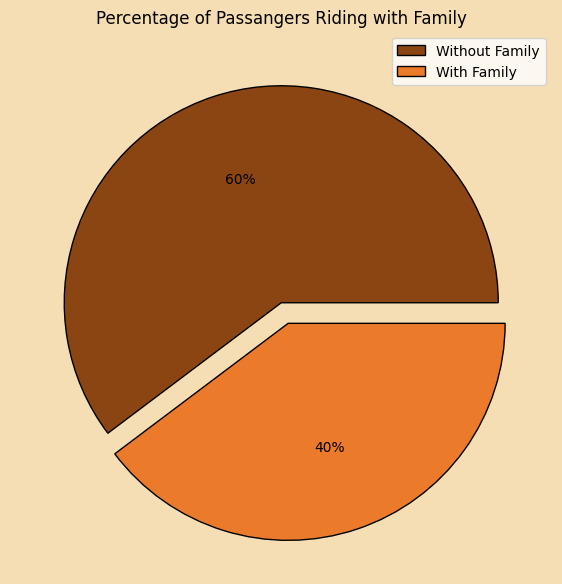

In [10]:
alone=len(titanic[(titanic['SibSp']==0) & (titanic['Parch']==0)])
not_alone=len(titanic[(titanic['SibSp']>0) | (titanic['Parch']>0)])

plt.figure(facecolor="wheat", figsize=(7,10))
plt.pie(
    (alone, not_alone),  
    colors=("#8B4513", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"},
    explode=(0,0.1)
)
plt.title("Percentage of Passangers Riding with Family")
plt.legend(["Without Family", "With Family"])


### Question 4: Which port of embarkment had the highest survival rate?

<bound method IndexOpsMixin.value_counts of Embarked
S    217
C     93
Q     30
Name: count, dtype: int64>


TypeError: unhashable type: 'numpy.ndarray'

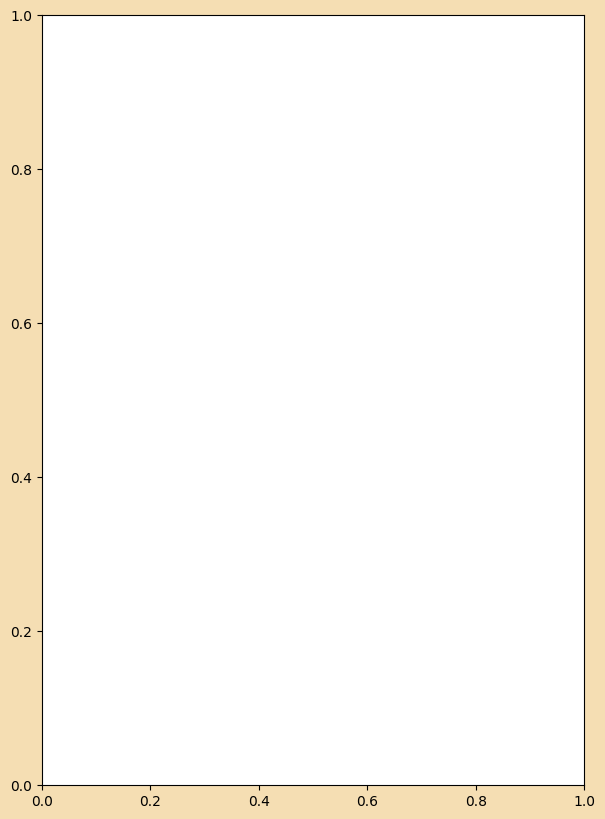

In [39]:
port_surv=titanic[titanic['Survived']==1]
port_surv=port_surv['Embarked'].value_counts()
print(port_surv.value_counts)

plt.figure(facecolor="wheat", figsize=(7,10))
plt.bar(
    (["S", "C", "Q"],[217, 93, 30]),
    height=250,
    
)